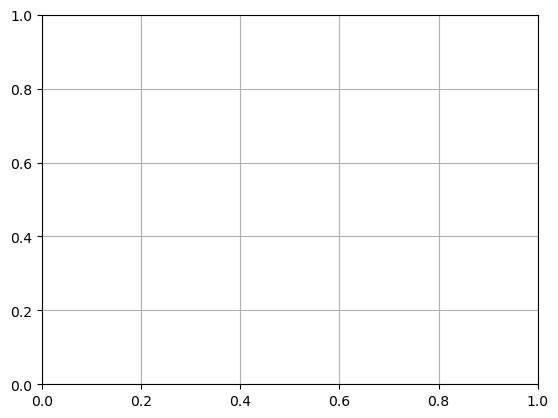

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

plt.rcParams["axes.grid"] = True

### Exemplo 01

Trace os seguintes sinais discretos no tempo:

a) $x_a = (-0.5)^n$

b) $x_b = 2^{-n}$

c) $x_c = (-2)^n$

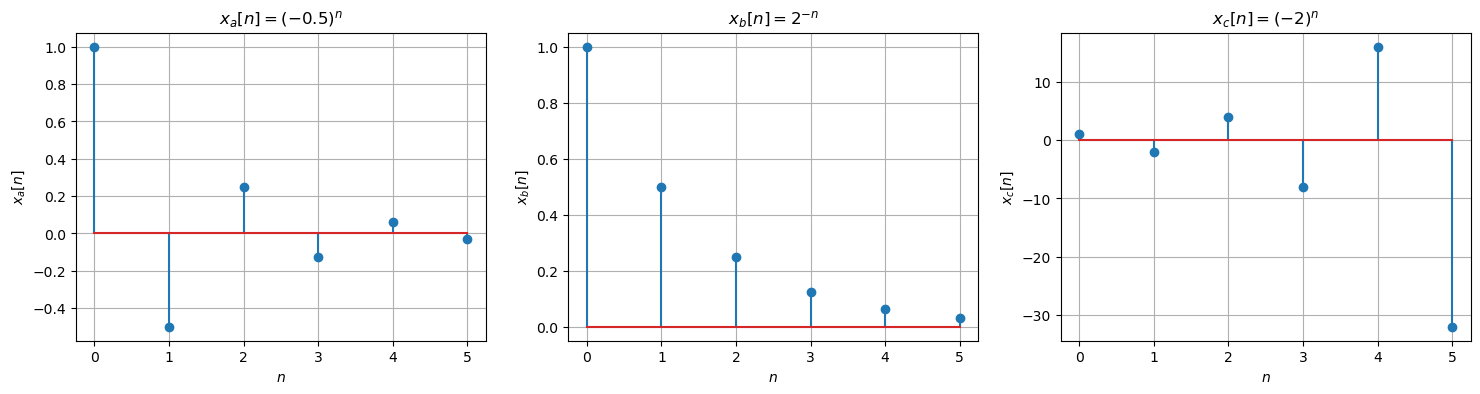

In [50]:
n = np.arange(0, 6)

x_a = (-0.5) ** n
x_b = (2.0) ** -n
x_c = (-2.0) ** n

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

axs[0].stem(n, x_a)
axs[0].set_title(r"$x_a[n] = (-0.5)^n$")
axs[0].set_xlabel(r"$n$")
axs[0].set_ylabel(r"$x_a[n]$")

axs[1].stem(n, x_b)
axs[1].set_title(r"$x_b[n] = 2^{-n}$")
axs[1].set_xlabel(r"$n$")
axs[1].set_ylabel(r"$x_b[n]$")

axs[2].stem(n, x_c)
axs[2].set_title(r"$x_c[n] = (-2)^n$")
axs[2].set_xlabel(r"$n$")
axs[2].set_ylabel(r"$x_c[n]$")

plt.show()

### Exemplo 2

Trace a seguinte senoide discreta no tempo

$$
x[n] = cos\left( \frac{\pi}{12} n + \frac{pi}{4}\right)

<StemContainer object of 3 artists>

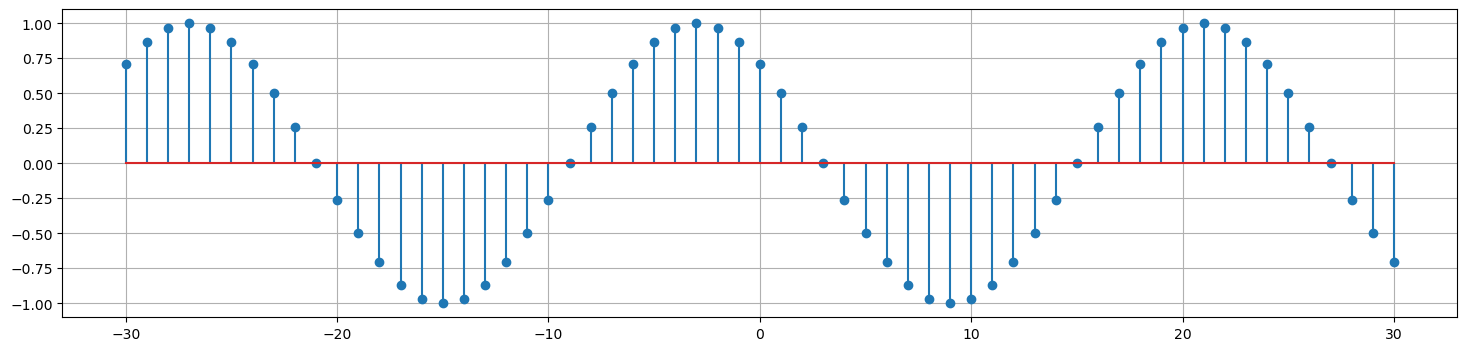

In [51]:
n = np.arange(-30, 31)

x = np.cos(n * np.pi / 12 + np.pi / 4)

fig, ax = plt.subplots(figsize=(18, 4))

ax.stem(n, x)

### Exemplo 3

Resolva iterativamente

$$
y[n+2] - y[n+1] + 0.24 y[n] = x[n+2] - 2 x[n+1] 
$$

com condições inicias $y[-1] = 2$ e $y[-2] = 1$ e entrada causal $x[n] = n$ (começando em $n=0$)

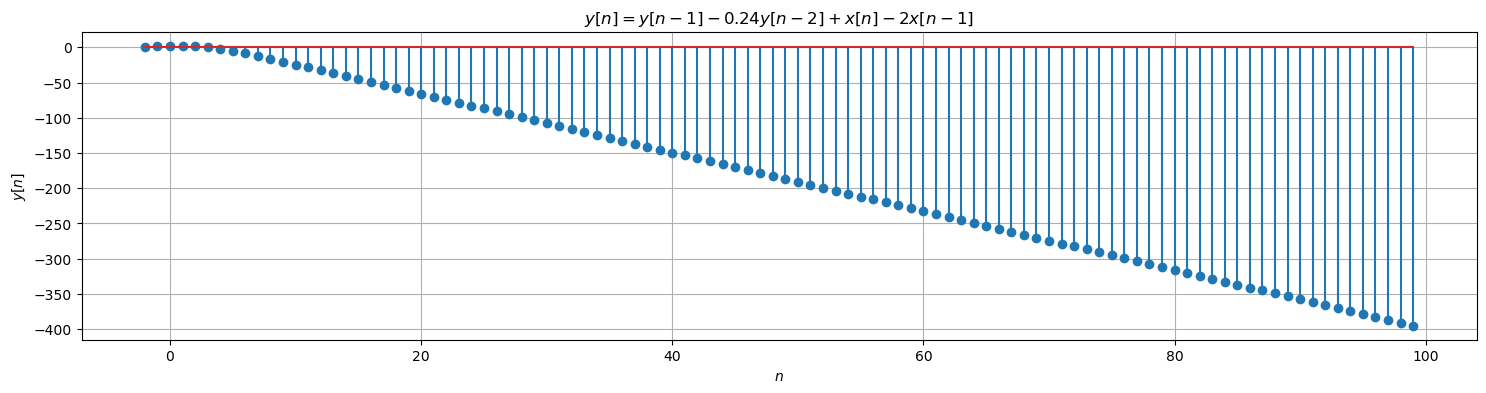

In [52]:
n = np.arange(-2, 100)

y = np.concatenate([[1, 2], np.zeros(len(n) - 2)])
x = np.concatenate([[0, 0], n[2:]])

for k in range(0, len(n) - 2):
    y[k + 2] = y[k + 1] - 0.24 * y[k] + x[k + 2] - 2 * x[k + 1]

fig, ax = plt.subplots(figsize=(18, 4))

ax.stem(n, y)
ax.set_title(r"$y[n] = y[n-1] - 0.24 y[n-2] + x[n] - 2 x[n-1]$")
ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$y[n]$")
plt.show()

### Exemplo 4

usando as condições iniciais $y[-1] = 2$ e $y[-2] = 1$, determine e trace a resposta de entrada nula para o sistema descrito por

$$
(E^2 - 1.56E + 0.81)y[n] = (E+3)x[n]
$$

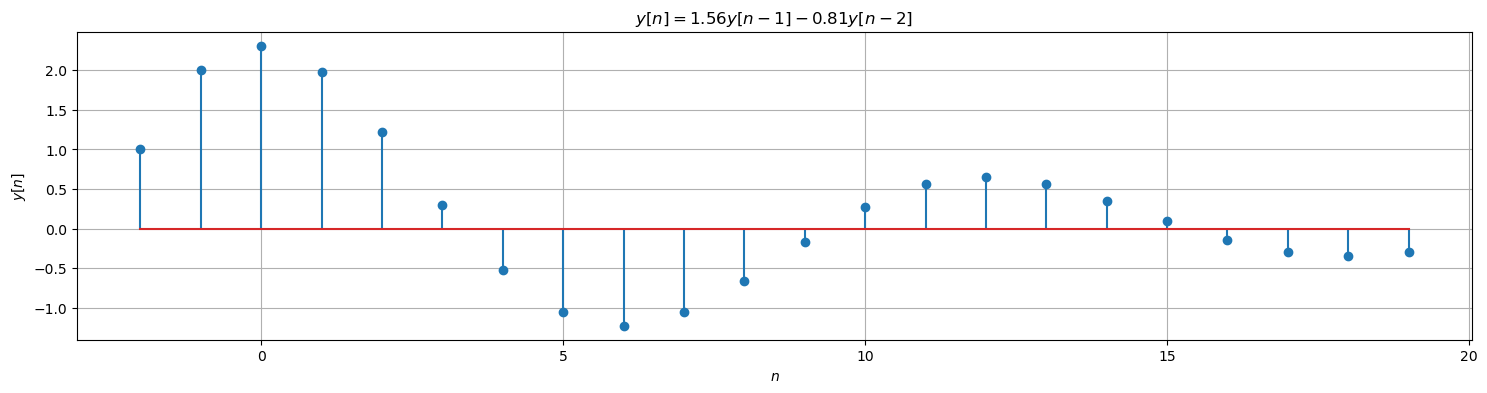

In [55]:
n = np.arange(-2, 20)

y = np.concatenate([[1, 2], np.zeros(len(n) - 2)])

for k in range(0, len(n) - 2):
    y[k + 2] = 1.56 * y[k + 1] - 0.81 * y[k]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))

axs.stem(n, y)
axs.set_title(r"$y[n] = 1.56 y[n-1] - 0.81 y[n-2]$")
axs.set_xlabel(r"$n$")
axs.set_ylabel(r"$y[n]$")

plt.show()

### Exemplo 05

Determine e trace a resposta de estado nulo para o sistema descrito por $(E^2+6E+9)y[n]=(2E^2+6E)x[n]$ para a entrada $x[n] = 4^{-n}u[n]$

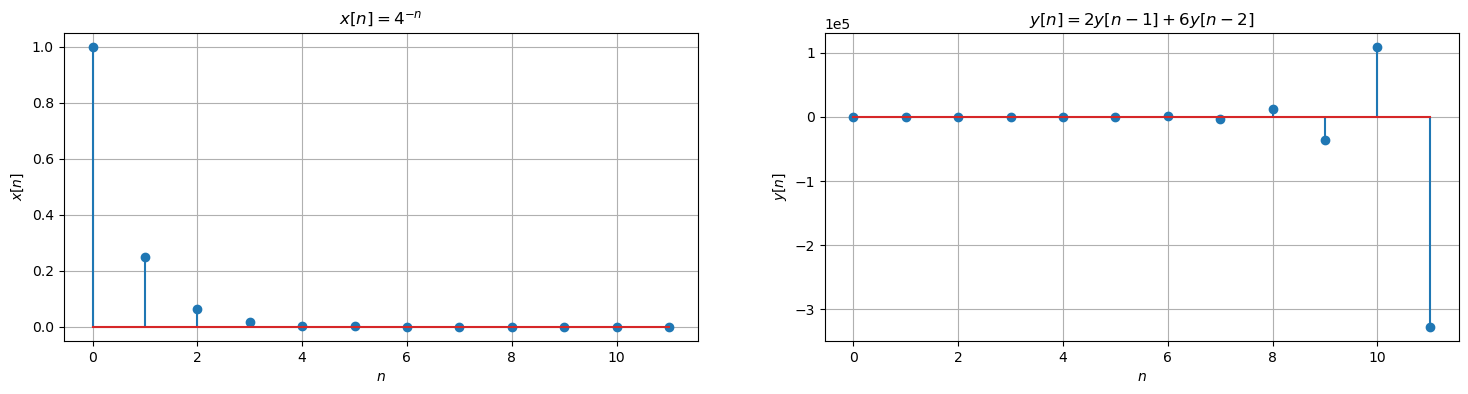

In [61]:
n = np.arange(0, 12)

x = 4.0**-n

a = [1, 6, 9]
b = [2, 6, 0]

y = signal.lfilter(b, a, x)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

axs[0].stem(n, x)
axs[0].set_title(r"$x[n] = 4^{-n}$")
axs[0].set_xlabel(r"$n$")
axs[0].set_ylabel(r"$x[n]$")

axs[1].stem(n, y)
axs[1].set_title(r"$y[n] = 2 y[n-1] + 6 y[n-2]$")
axs[1].set_xlabel(r"$n$")
axs[1].set_ylabel(r"$y[n]$")
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))


plt.show()

### Exemplo 06

Para os sinais $x[n]$ e $g[n]$, trace $c[n]$ = $x[n] * g[n]$

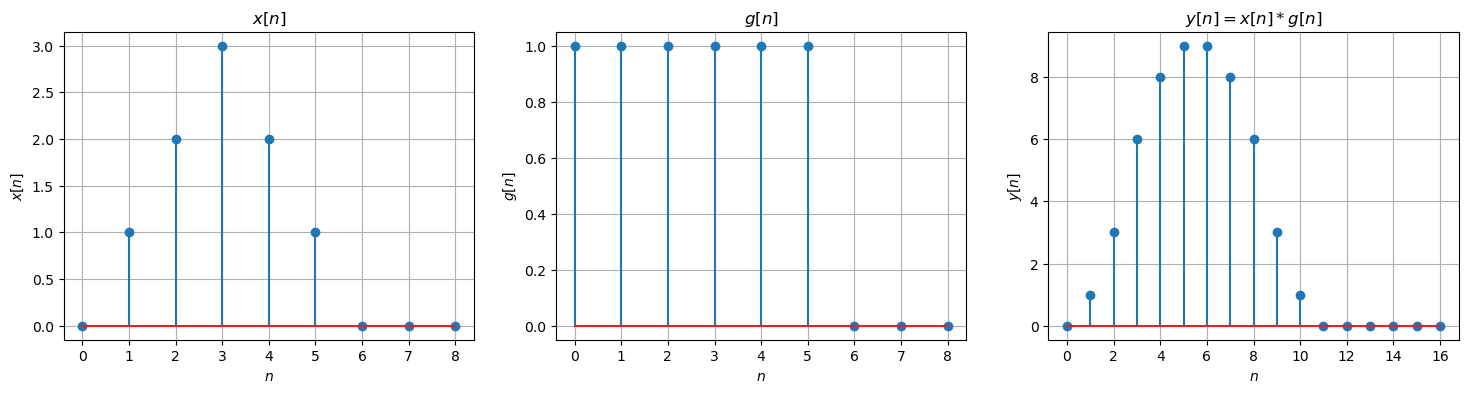

In [62]:
x = [0, 1, 2, 3, 2, 1, 0, 0, 0]
g = [1, 1, 1, 1, 1, 1, 0, 0, 0]

n = np.arange(0, len(x) + len(g) - 1)

y = np.convolve(x, g)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

axs[0].stem(np.arange(0, len(x)), x)
axs[0].set_title(r"$x[n]$")
axs[0].set_xlabel(r"$n$")
axs[0].set_ylabel(r"$x[n]$")

axs[1].stem(np.arange(0, len(g)), g)
axs[1].set_title(r"$g[n]$")
axs[1].set_xlabel(r"$n$")
axs[1].set_ylabel(r"$g[n]$")

axs[2].stem(n, y)
axs[2].set_title(r"$y[n] = x[n] * g[n]$")
axs[2].set_xlabel(r"$n$")
axs[2].set_ylabel(r"$y[n]$")

plt.show()

### Exemplo 07

O comando filter do MATLAB é uma forma eficiente para calcular a resposta do sistema de uma equação diferença linear de coeficientes constantes representada na forma atraso como

$$
\sum_{k=0}^{N} a_k y[n-k] = \sum_{k=0}^{N} b_k x[n-k]
$$

Na forma mais simples, o comando filter necessita de três argumentos de entrada: um vetor de tamanho $N + 1$ com os coeficientes de alimentação $[b_0, b_1, b_2,...,b_N]$ um vetor de tamanho $N + 1$ com os coeficientes de realimentação $[a_0, a_1, a_2,...,a_N]$ e um vetor de entrada. Como nenhuma condição inicial foi especificada, a saída corresponde à resposta de estado nulo do sistema. A título de exemplo, considere um sistema descrito por $y[n] - y[n-1]+y[n-2]=x[n]$. Quando $x[n] = $\delta[n]$, a resposta de estado nulo é igual a resposta $h[n]$ ao impulso, a qual nós calculamos para $(0 \leq n \leq 30)$.


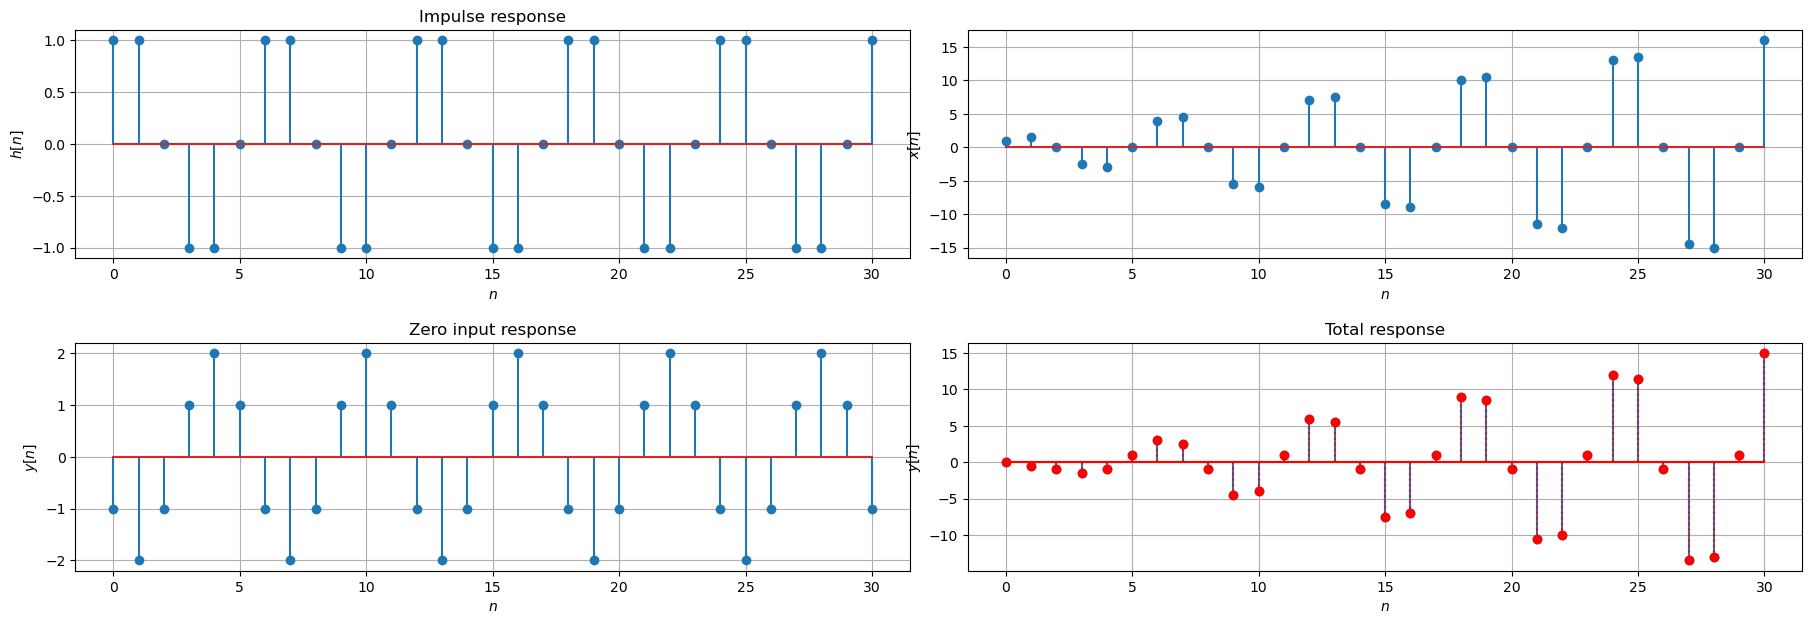

In [95]:
b = [1, 0, 0]
a = [1, -1, 1]

n = np.arange(0, 31)

impulse = lambda n: [1.0 if i == 0 else 0.0 for i in n]

h = signal.lfilter(b, a, impulse(n))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))
fig.tight_layout(h_pad=4)

axs[0, 0].stem(n, h)
axs[0, 0].set_title("Impulse response")
axs[0, 0].set_xlabel(r"$n$")
axs[0, 0].set_ylabel(r"$h[n]$")

x = np.cos(2 * np.pi * n / 6) * np.heaviside(n, 1)
y = signal.lfilter(b, a, x)

axs[0, 1].stem(n, y)
axs[0, 1].set_xlabel(r"$n$")
axs[0, 1].set_ylabel(r"$x[n]$")

zi = signal.lfiltic(b, a, [1, 2])
y_0 = signal.lfilter(b, a, np.zeros(len(n)), zi=zi)[0]

axs[1, 0].stem(n, y_0)
axs[1, 0].set_xlabel(r"$n$")
axs[1, 0].set_ylabel(r"$y[n]$")
axs[1, 0].set_title("Zero input response")

y_total = signal.lfilter(b, a, x, zi=zi)[0]

axs[1, 1].stem(n, y_total)
axs[1, 1].set_xlabel(r"$n$")
axs[1, 1].set_ylabel(r"$y[n]$")
axs[1, 1].set_title("Total response")
axs[1, 1].stem(n, y + y_0, linefmt="r:", markerfmt="ro", basefmt="r-")

plt.show()

### Exemplo 08

Trace a convolução de $u[n+4]-u[n]$ com $u[n]-u[n-4]$

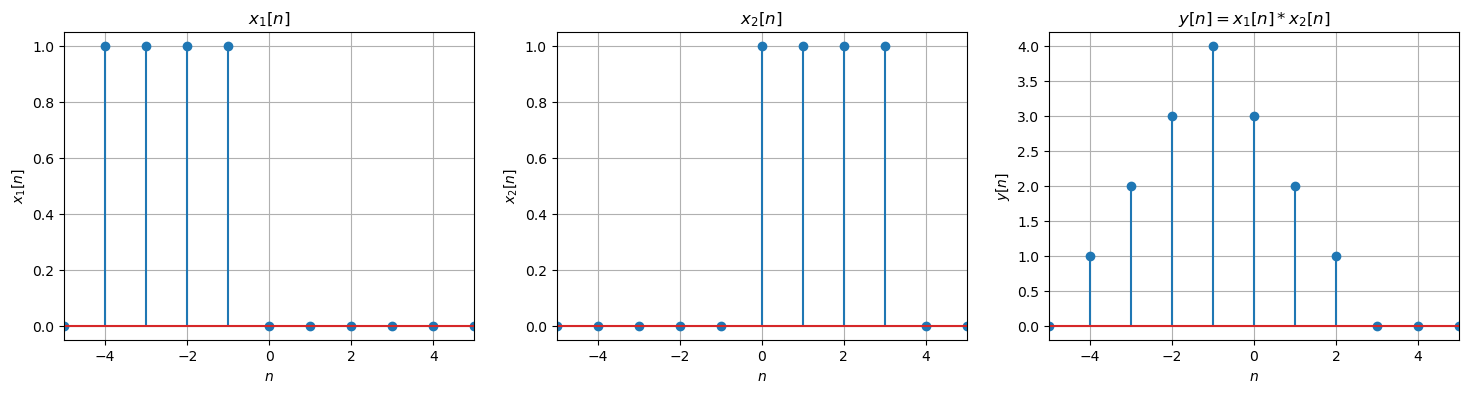

In [107]:
n = np.arange(-10, 11)

x_1 = np.heaviside(n + 4, 1) - np.heaviside(n, 1)
x_2 = np.heaviside(n, 1) - np.heaviside(n - 4, 1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

axs[0].stem(n, x_1)
axs[0].set_title(r"$x_1[n]$")
axs[0].set_xlabel(r"$n$")
axs[0].set_ylabel(r"$x_1[n]$")
axs[0].set_xlim(-5, 5)

axs[1].stem(n, x_2)
axs[1].set_title(r"$x_2[n]$")
axs[1].set_xlabel(r"$n$")
axs[1].set_ylabel(r"$x_2[n]$")
axs[1].set_xlim(-5, 5)

y = np.convolve(x_1, x_2)

axs[2].stem(np.arange(-20, 21), y)
axs[2].set_title(r"$y[n] = x_1[n] * x_2[n]$")
axs[2].set_xlabel(r"$n$")
axs[2].set_ylabel(r"$y[n]$")
axs[2].set_xlim(-5, 5)

plt.show()

### Exemplo 09

Suponha que o sinal $x(t) = cos(2*\pi*5*t)